In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/var/home/rafo/vscode02/pandas_and_data_science/Hitters.csv")
df = data.copy()
df = df.iloc[2:,:]
df.dropna(inplace = True,axis = 0)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,262.0,403.980916,147.486721,19.0,282.25,414.0,526.00,687.0
Hits,262.0,107.931298,45.181065,1.0,71.25,103.5,141.75,238.0
HmRun,262.0,11.637405,8.769189,0.0,5.00,9.0,18.00,40.0
Runs,262.0,54.862595,25.517559,0.0,34.00,52.5,73.00,130.0
RBI,262.0,51.538168,25.918759,0.0,30.00,47.0,71.00,121.0
Walks,262.0,41.122137,21.759227,0.0,23.00,37.0,57.00,105.0
Years,262.0,7.286260,4.784846,1.0,4.00,6.0,10.00,24.0
CAtBat,262.0,2654.522901,2290.433309,19.0,836.75,1929.5,3900.25,14053.0
CHits,262.0,721.755725,649.402532,4.0,211.00,513.0,1058.00,4256.0
CHmRun,262.0,69.240458,82.354896,0.0,15.00,39.5,92.75,548.0


In [5]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

In [6]:
y = df["Salary"]
x_ = df.drop(["NewLeague","Salary","Division","League"],axis = 1)
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 random_state=42,
                                                 test_size=0.25)

In [8]:
ridge_model = Ridge(alpha=0.02).fit(x_train,y_train)

In [9]:
ridge_model


Ridge(alpha=0.02)

In [10]:
ridge_model.coef_

array([-2.08303656e+00,  8.81391354e+00,  4.37685030e+00, -2.90521354e+00,
       -2.63315285e+00,  7.42477697e+00, -9.84818041e-01, -9.12651041e-02,
       -3.06436470e-01, -9.68523610e-01,  1.78849873e+00,  1.02992036e+00,
       -1.01590988e+00,  1.72712288e-01,  3.08810345e-01, -1.26281406e+00,
        6.53053157e+01, -9.14878949e+01, -2.49780144e+01])

In [11]:
import numpy as np
lamda = 10**np.linspace(20,-8,200)*0.5
ridge_model2 = Ridge()
coef = []
for i in lamda:
    ridge_model2.set_params(alpha = i)
    ridge_model2.fit(x_train,y_train)
    coef.append(ridge_model2.coef_)


Text(0.5, 1.0, 'Ridge əmsalları')

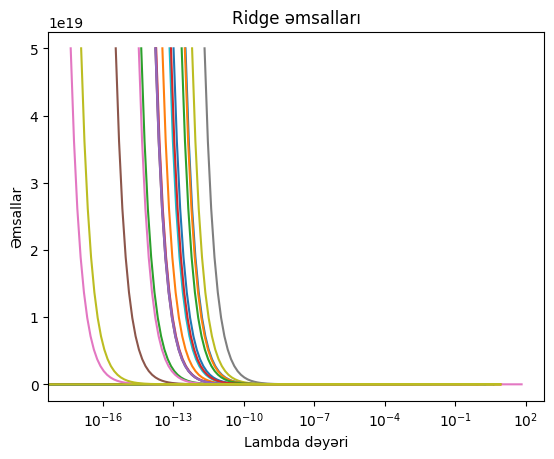

In [12]:
import matplotlib.pyplot as plt
fig = plt.gca()
fig.plot(coef,lamda)
fig.set_xscale("log")
plt.xlabel("Lambda dəyəri")
plt.ylabel("Əmsallar")
plt.title("Ridge əmsalları")

Model Tuning

In [14]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lamda,scoring="neg_mean_squared_error")

In [15]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([5.00000000e+19, 3.61631695e+19, 2.61554965e+19, 1.89173131e+19,
       1.36822000e+19, 9.89583434e+18, 7.15729469e+18, 5.17660922e+18,
       3.74405193e+18, 2.70793569e+18, 1.95855075e+18, 1.41654805e+18,
       1.02453734e+18, 7.41010353e+17, 5.35945660e+17, 3.87629874e+17,
       2.80358497e+17, 2.02773037e+17, 1.46658314e+17, 1.06072589e+17,
       7.67184204e+16, 5.54876248e+1...
       8.61292983e-06, 6.22941682e-06, 4.50550913e-06, 3.25866980e-06,
       2.35687657e-06, 1.70464253e-06, 1.23290554e-06, 8.91715438e-07,
       6.44945131e-07, 4.66465201e-07, 3.37377203e-07, 2.44012579e-07,
       1.76485365e-07, 1.27645403e-07, 9.23212471e-08, 6.67725781e-08,
       4.82941612e-08, 3.49293987e-08, 2.52631553e-08, 1.82719154e-08,
       1.32154074e-08, 9.55822038e-09, 6.91311087e-09, 5.00000000e-09]),
        scoring='neg_mean_squared_error')

In [16]:
ridge_cv.alpha_

6301.914648398637

In [18]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(x_train,y_train)

In [19]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(x_test)))

334.05831453184686